In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainingSet = pd.read_csv('Google_Stock_Price_Train.csv')
trainingSet = trainingSet.iloc[:, 1 : 2]

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
trainingSet = sc.fit_transform(trainingSet)

In [4]:
xTrain = trainingSet[:-1]
yTrain = trainingSet[1:]

In [5]:
xTrain = xTrain.reshape(1257, 1, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [10]:
model.add(Dense(units = 1))

In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
model.fit(xTrain, yTrain, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 0s 103us/step - loss: 2.4940e-04
Epoch 2/200
1257/1257 [==============================] - 0s 99us/step - loss: 2.5481e-04
Epoch 3/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.4764e-04
Epoch 4/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.4741e-04
Epoch 5/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.4881e-04
Epoch 6/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.4875e-04
Epoch 7/200
1257/1257 [==============================] - 0s 105us/step - loss: 2.5794e-04
Epoch 8/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.4882e-04
Epoch 9/200
1257/1257 [==============================] - 0s 100us/step - loss: 2.4936e-04 0s - loss: 2.4212e-0
Epoch 10/200
1257/1257 [==============================] - 0s 101us/step - loss: 2.5097e-04
Epoch 11/200
1257/1257 [==============================] - 0s 101us/step - loss: 2.48

1257/1257 [==============================] - 0s 100us/step - loss: 2.4935e-04
Epoch 92/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.4705e-04
Epoch 93/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.4668e-04
Epoch 94/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.4770e-04
Epoch 95/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.4806e-04
Epoch 96/200
1257/1257 [==============================] - 0s 92us/step - loss: 2.5115e-04
Epoch 97/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.5235e-04
Epoch 98/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.5153e-04
Epoch 99/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5087e-04
Epoch 100/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.5181e-04
Epoch 101/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.4721e-04
Epoch 102/200
1257/1

1257/1257 [==============================] - 0s 95us/step - loss: 2.4757e-04
Epoch 181/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.4580e-04: 0s - loss: 2.4627e-0
Epoch 182/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.4593e-04
Epoch 183/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.4925e-04
Epoch 184/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.4683e-04
Epoch 185/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.4819e-04
Epoch 186/200
1257/1257 [==============================] - 0s 92us/step - loss: 2.4613e-04
Epoch 187/200
1257/1257 [==============================] - 0s 92us/step - loss: 2.4800e-04
Epoch 188/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.4550e-04
Epoch 189/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.4502e-04
Epoch 190/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.

In [18]:
testSet = pd.read_csv('Google_Stock_Price_Test.csv')
realStockPrice = testSet.iloc[:, 1 : 2]

In [20]:
inputs = realStockPrice
inputs = sc.transform(inputs)
inputs = inputs.reshape(20, 1, 1)

In [21]:
predictedStockPrice = model.predict(inputs)
predictedStockPrice = sc.inverse_transform(predictedStockPrice)

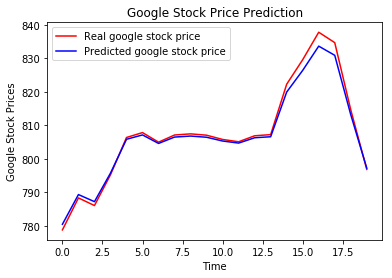

In [23]:
plt.plot(realStockPrice, color = 'red', label = 'Real google stock price')
plt.plot(predictedStockPrice, color = 'blue', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()